Grover algorithm
==============

Grover algorithm for two qubits
==========================

Based on work from Zhang J, Hegde SS, Suter D. Efficient Implementation of a Quantum Algorithm in a Single Nitrogen-Vacancy Center of Diamond. Phys Rev Lett. 2020 Jul 17;125

The oracle returns a phase flip for the two quits marked only.  Following Zhang the Z gate is shown as a P(PI) gate

In [1]:
from qiskit import(
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    execute,
    Aer
    )

import math

In [2]:
SHOTS = 1000                     #Number of shots to run    
SIMULATOR = Aer.get_backend('qasm_simulator')
#enter the case to chose the relevant oracle
CASE = '11'
PI = math.pi

In [3]:
cd = QuantumRegister(1,'electron')
ce = QuantumRegister(1,'c13_nuclear')
sd = ClassicalRegister(1,'measure_electron') 
se = ClassicalRegister(1,'measure_c13_nuclear') 
qc = QuantumCircuit(cd, ce, sd, se)

In [4]:
def init():
    qc.reset(cd[0])
    qc.reset(ce[0])

In [5]:
def H12():
    qc.h(cd[0])
    qc.h(ce[0])

In [6]:
# oracle for |00> state
def I00():
    qc.h(ce[0])
    qc.cx(cd[0], ce[0])
    qc.h(ce[0])
    qc.p(PI, cd[0])
    qc.p(PI, ce[0])

In [7]:
# oracle for |01> state
def I01():
    qc.h(ce[0])
    qc.cx(cd[0], ce[0])
    qc.h(ce[0])
    qc.p(PI, ce[0])

In [8]:
# oracle for |10> state
def I10():
    qc.h(ce[0])
    qc.cx(cd[0], ce[0])
    qc.h(ce[0])
    qc.p(PI, cd[0])

In [9]:
# oracle for |11> state
def I11():
    qc.h(ce[0])
    qc.cx(cd[0], ce[0])
    qc.h(ce[0])

In [10]:
def measure():
    qc.measure(cd, sd)
    qc.measure(ce, se)

In [11]:
init()
qc.barrier()
# set up equal superposition of states
H12()
qc.barrier()
#include relevant oracle
if CASE == '00':
    I00()
elif CASE == '01':
    I01()
elif CASE == '10':
    I10()
elif CASE == '11':
    I11()
else:
    raise ValueError(f'case {CASE} not coded')
#diffuser changes phase of all quantum states
qc.barrier()
H12()
qc.barrier()
I00()
qc.barrier()
H12()
#quantum tomography
measure()

In [12]:
result = execute(qc, SIMULATOR, shots = SHOTS).result()
counts = result.get_counts(qc)
print ('The different states can be counted.  The simulated result are', counts)

The different states can be counted.  The simulated result are {'1 1': 1000}


Note, Qiskit reverses order of bits from that expected

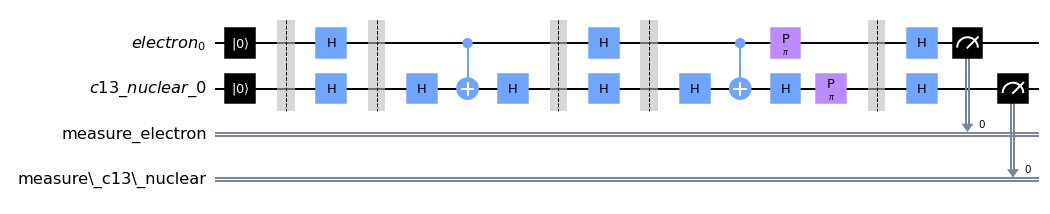

In [13]:
#save circuit
fname = 'Grover algorithm case ' + CASE + '.jpg'
qc.draw(output='mpl', filename = fname)